In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sea
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'dataset/Fortune 500 Companies.csv',delimiter=',')

In [3]:
data.head(5)

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     13940 non-null  object 
 1   rank                     13940 non-null  int64  
 2   year                     13940 non-null  int64  
 3   industry                 13940 non-null  object 
 4   sector                   4500 non-null   object 
 5   headquarters_state       13940 non-null  object 
 6   headquarters_city        7495 non-null   object 
 7   market_value_mil         5185 non-null   float64
 8   revenue_mil              13940 non-null  float64
 9   profit_mil               5497 non-null   float64
 10  asset_mil                5500 non-null   float64
 11  employees                4500 non-null   float64
 12  founder_is_ceo           4500 non-null   object 
 13  female_ceo               4500 non-null   object 
 14  newcomer_to_fortune_50

# Alteracoes no conjunto de dado
Mudando o valores `NaN` para nula para melhor seleção, remoção de dados

In [5]:
for NomeColuna in data.columns.to_list():
    data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'

/tmp/ipykernel_5619/1026323354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'
/tmp/ipykernel_5619/1026323354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'
/tmp/ipykernel_5619/1026323354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'
/tmp/ipykernel_5619



'valor de mercado mi'
'receita mil'
lucro mil
mil de ativos
funcionários

In [6]:
data.columns = [
    'nome',
    'rank',
    'ano',
    'industria',
    'setor',
    'sede_estado', 
    'sede_cidade',
    'valor_de_mercado_mi',
    'receite_mil',
    'lucro_mil',
    'ativos_mil',
    'funcionários',
    'fundador_is_ceo',
    'ceo_feminino',
    'recém-chegado à Fortune 500',
    'global_500'
]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nome                         13940 non-null  object
 1   rank                         13940 non-null  object
 2   ano                          13940 non-null  object
 3   industria                    13940 non-null  object
 4   setor                        13940 non-null  object
 5   sede_estado                  13940 non-null  object
 6   sede_cidade                  13940 non-null  object
 7   valor_de_mercado_mi          13940 non-null  object
 8   receite_mil                  13940 non-null  object
 9   lucro_mil                    13940 non-null  object
 10  ativos_mil                   13940 non-null  object
 11  funcionários                 13940 non-null  object
 12  fundador_is_ceo              13940 non-null  object
 13  ceo_feminino                 13

In [8]:
data.head(5)

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Nulo,MI,Nulo,Nulo,168828.6,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Nulo,MI,Nulo,Nulo,137137.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
2,Exxon Corporation,3,1996,Petroleum Refining,Nulo,TX,Nulo,Nulo,110009.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,Nulo,AR,Nulo,Nulo,93627.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
4,AT&T Corp.,5,1996,Telecommunications,Nulo,NY,Nulo,Nulo,79609.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo


# Analisando dados

In [9]:
data.loc[data['setor']!='Nulo']

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
9440,Walmart,1,2015,General Merchandisers,Retailing,AR,Bentonville,265344.0,485651.0,16363.0,203706.0,2200000.0,no,no,no,Nulo
9441,Exxon Mobil,2,2015,Petroleum Refining,Energy,TX,Irving,356549.0,382597.0,32520.0,349493.0,83700.0,no,no,no,Nulo
9442,Chevron,3,2015,Petroleum Refining,Energy,CA,San Ramon,197381.0,203784.0,19241.0,266026.0,64700.0,no,no,no,Nulo
9443,Berkshire Hathaway,4,2015,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,357344.0,194673.0,19872.0,526186.0,316000.0,no,no,no,Nulo
9444,Apple,5,2015,"Computers, Office Equipment",Technology,CA,Cupertino,724773.0,182795.0,39510.0,231839.0,97200.0,no,no,no,Nulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [10]:
data['setor'].value_counts()

setor
Nulo                             9440
Financials                        777
Energy                            547
Retailing                         422
Technology                        393
Health Care                       368
Food, Beverages & Tobacco         223
Wholesalers                       210
Materials                         177
Business Services                 169
Transportation                    158
Industrials                       155
Chemicals                         125
Engineering & Construction        112
Household Products                103
Motor Vehicles & Parts            100
Aerospace & Defense                96
Media                              93
Hotels, Restaurants & Leisure      89
Telecommunications                 81
Food & Drug Stores                 55
Apparel                            47
Name: count, dtype: int64

In [11]:
data['industria'].value_counts()

industria
Utilities: Gas and Electric                 753
Commercial Banks                            590
Insurance: Property and Casualty (Stock)    497
Chemicals                                   420
Motor Vehicles & Parts                      385
                                           ... 
Payroll Services                              5
X Brokerage                                   5
Equipment Leasing                             4
Education                                     3
Marine services                               2
Name: count, Length: 94, dtype: int64

# Em relação ao setor

In [12]:
dataSetor = data.loc[data['setor']!='Nulo']
dataSetor.head(5)

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
9440,Walmart,1,2015,General Merchandisers,Retailing,AR,Bentonville,265344.0,485651.0,16363.0,203706.0,2200000.0,no,no,no,Nulo
9441,Exxon Mobil,2,2015,Petroleum Refining,Energy,TX,Irving,356549.0,382597.0,32520.0,349493.0,83700.0,no,no,no,Nulo
9442,Chevron,3,2015,Petroleum Refining,Energy,CA,San Ramon,197381.0,203784.0,19241.0,266026.0,64700.0,no,no,no,Nulo
9443,Berkshire Hathaway,4,2015,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,357344.0,194673.0,19872.0,526186.0,316000.0,no,no,no,Nulo
9444,Apple,5,2015,"Computers, Office Equipment",Technology,CA,Cupertino,724773.0,182795.0,39510.0,231839.0,97200.0,no,no,no,Nulo


In [13]:
dataSetor.groupby('setor')['funcionários'].sum()

setor
Aerospace & Defense               7732717.0
Apparel                           2119897.0
Business Services                 8003821.0
Chemicals                         3527178.0
Energy                            7806411.0
Engineering & Construction        2976879.0
Financials                       28982446.0
Food & Drug Stores               11567085.0
Food, Beverages & Tobacco         9194266.0
Health Care                      22670724.0
Hotels, Restaurants & Leisure    14944879.0
Household Products                4110744.0
Industrials                       9937615.0
Materials                         3899012.0
Media                             3299604.0
Motor Vehicles & Parts            8224145.0
Retailing                        57879321.0
Technology                       26642366.0
Telecommunications                6719065.0
Transportation                   12935520.0
Wholesalers                       4973951.0
Name: funcionários, dtype: object

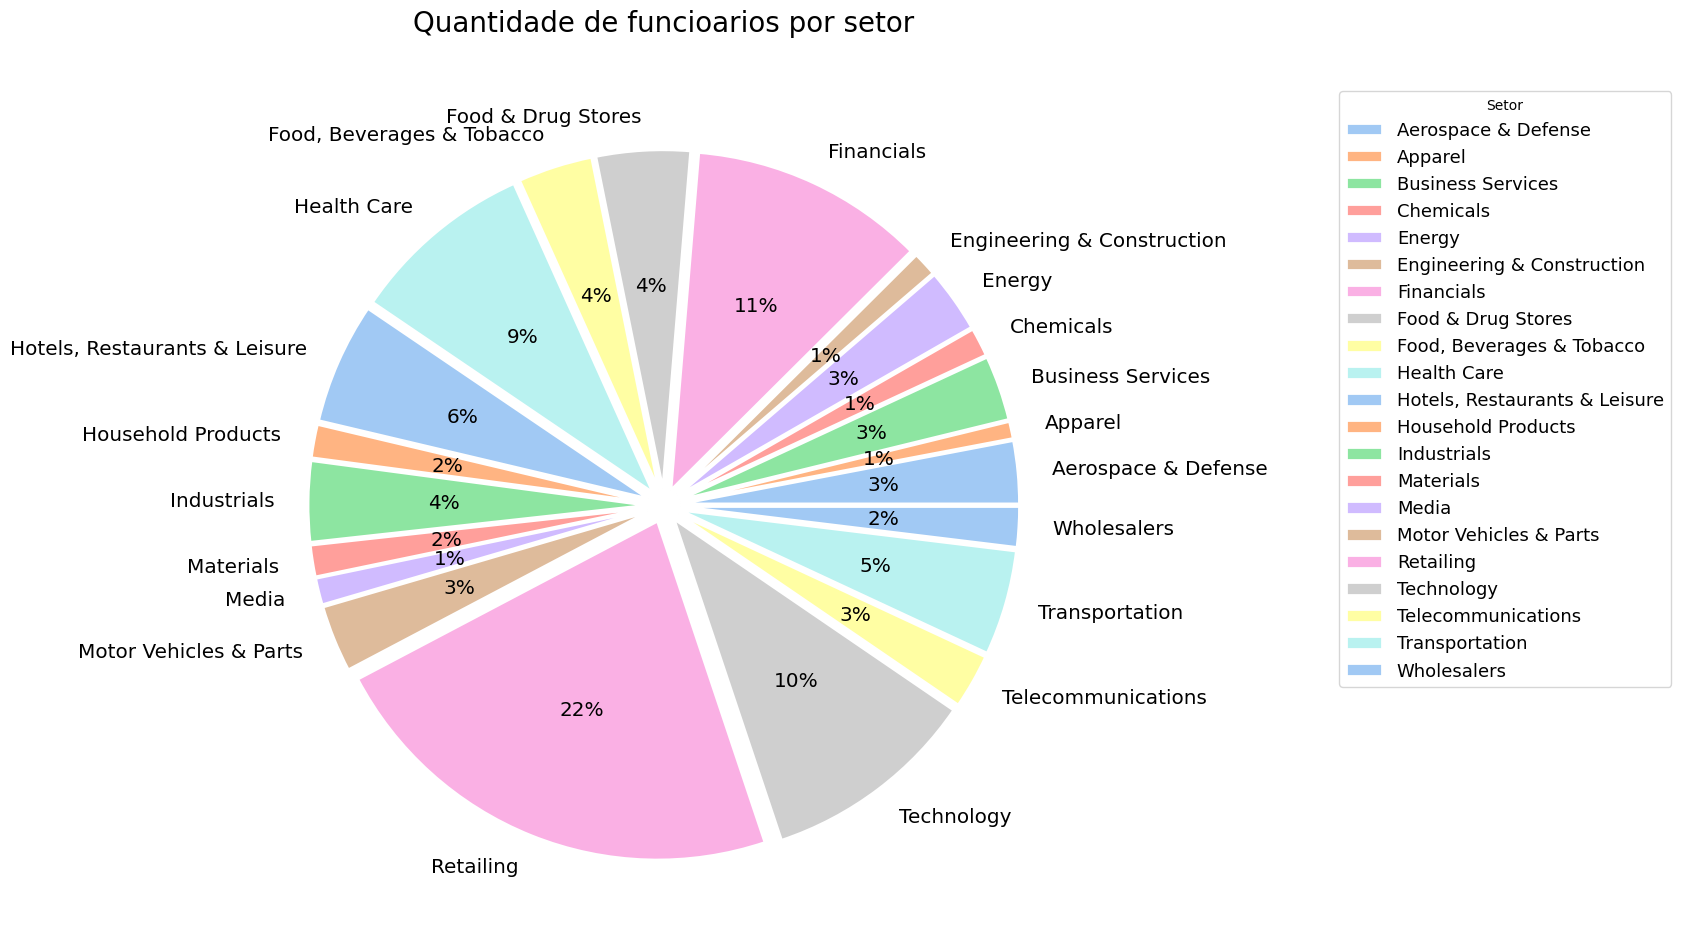

In [14]:
dados = dataSetor.groupby('setor')['funcionários'].sum()
colors = sea.color_palette('pastel')[0:len(dados)]

plt.figure(figsize=(15,11))
plt.title('Quantidade de funcioarios por setor',fontsize=20,y=1.05)
plt.pie(
    x      = dados.values,
    labels = dados.index.values,
    autopct='%.0f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors=colors,
    explode= tuple([0.05 for i in range(len(dados))])
)
plt.legend(dados.index.values,title="Setor",bbox_to_anchor=(1, 0, 0.7, 1),fontsize=13)
plt.show()

In [15]:
dataSetor2 = dataSetor.drop(
    dataSetor.loc[dataSetor['valor_de_mercado_mi']=='Nulo'].index
)

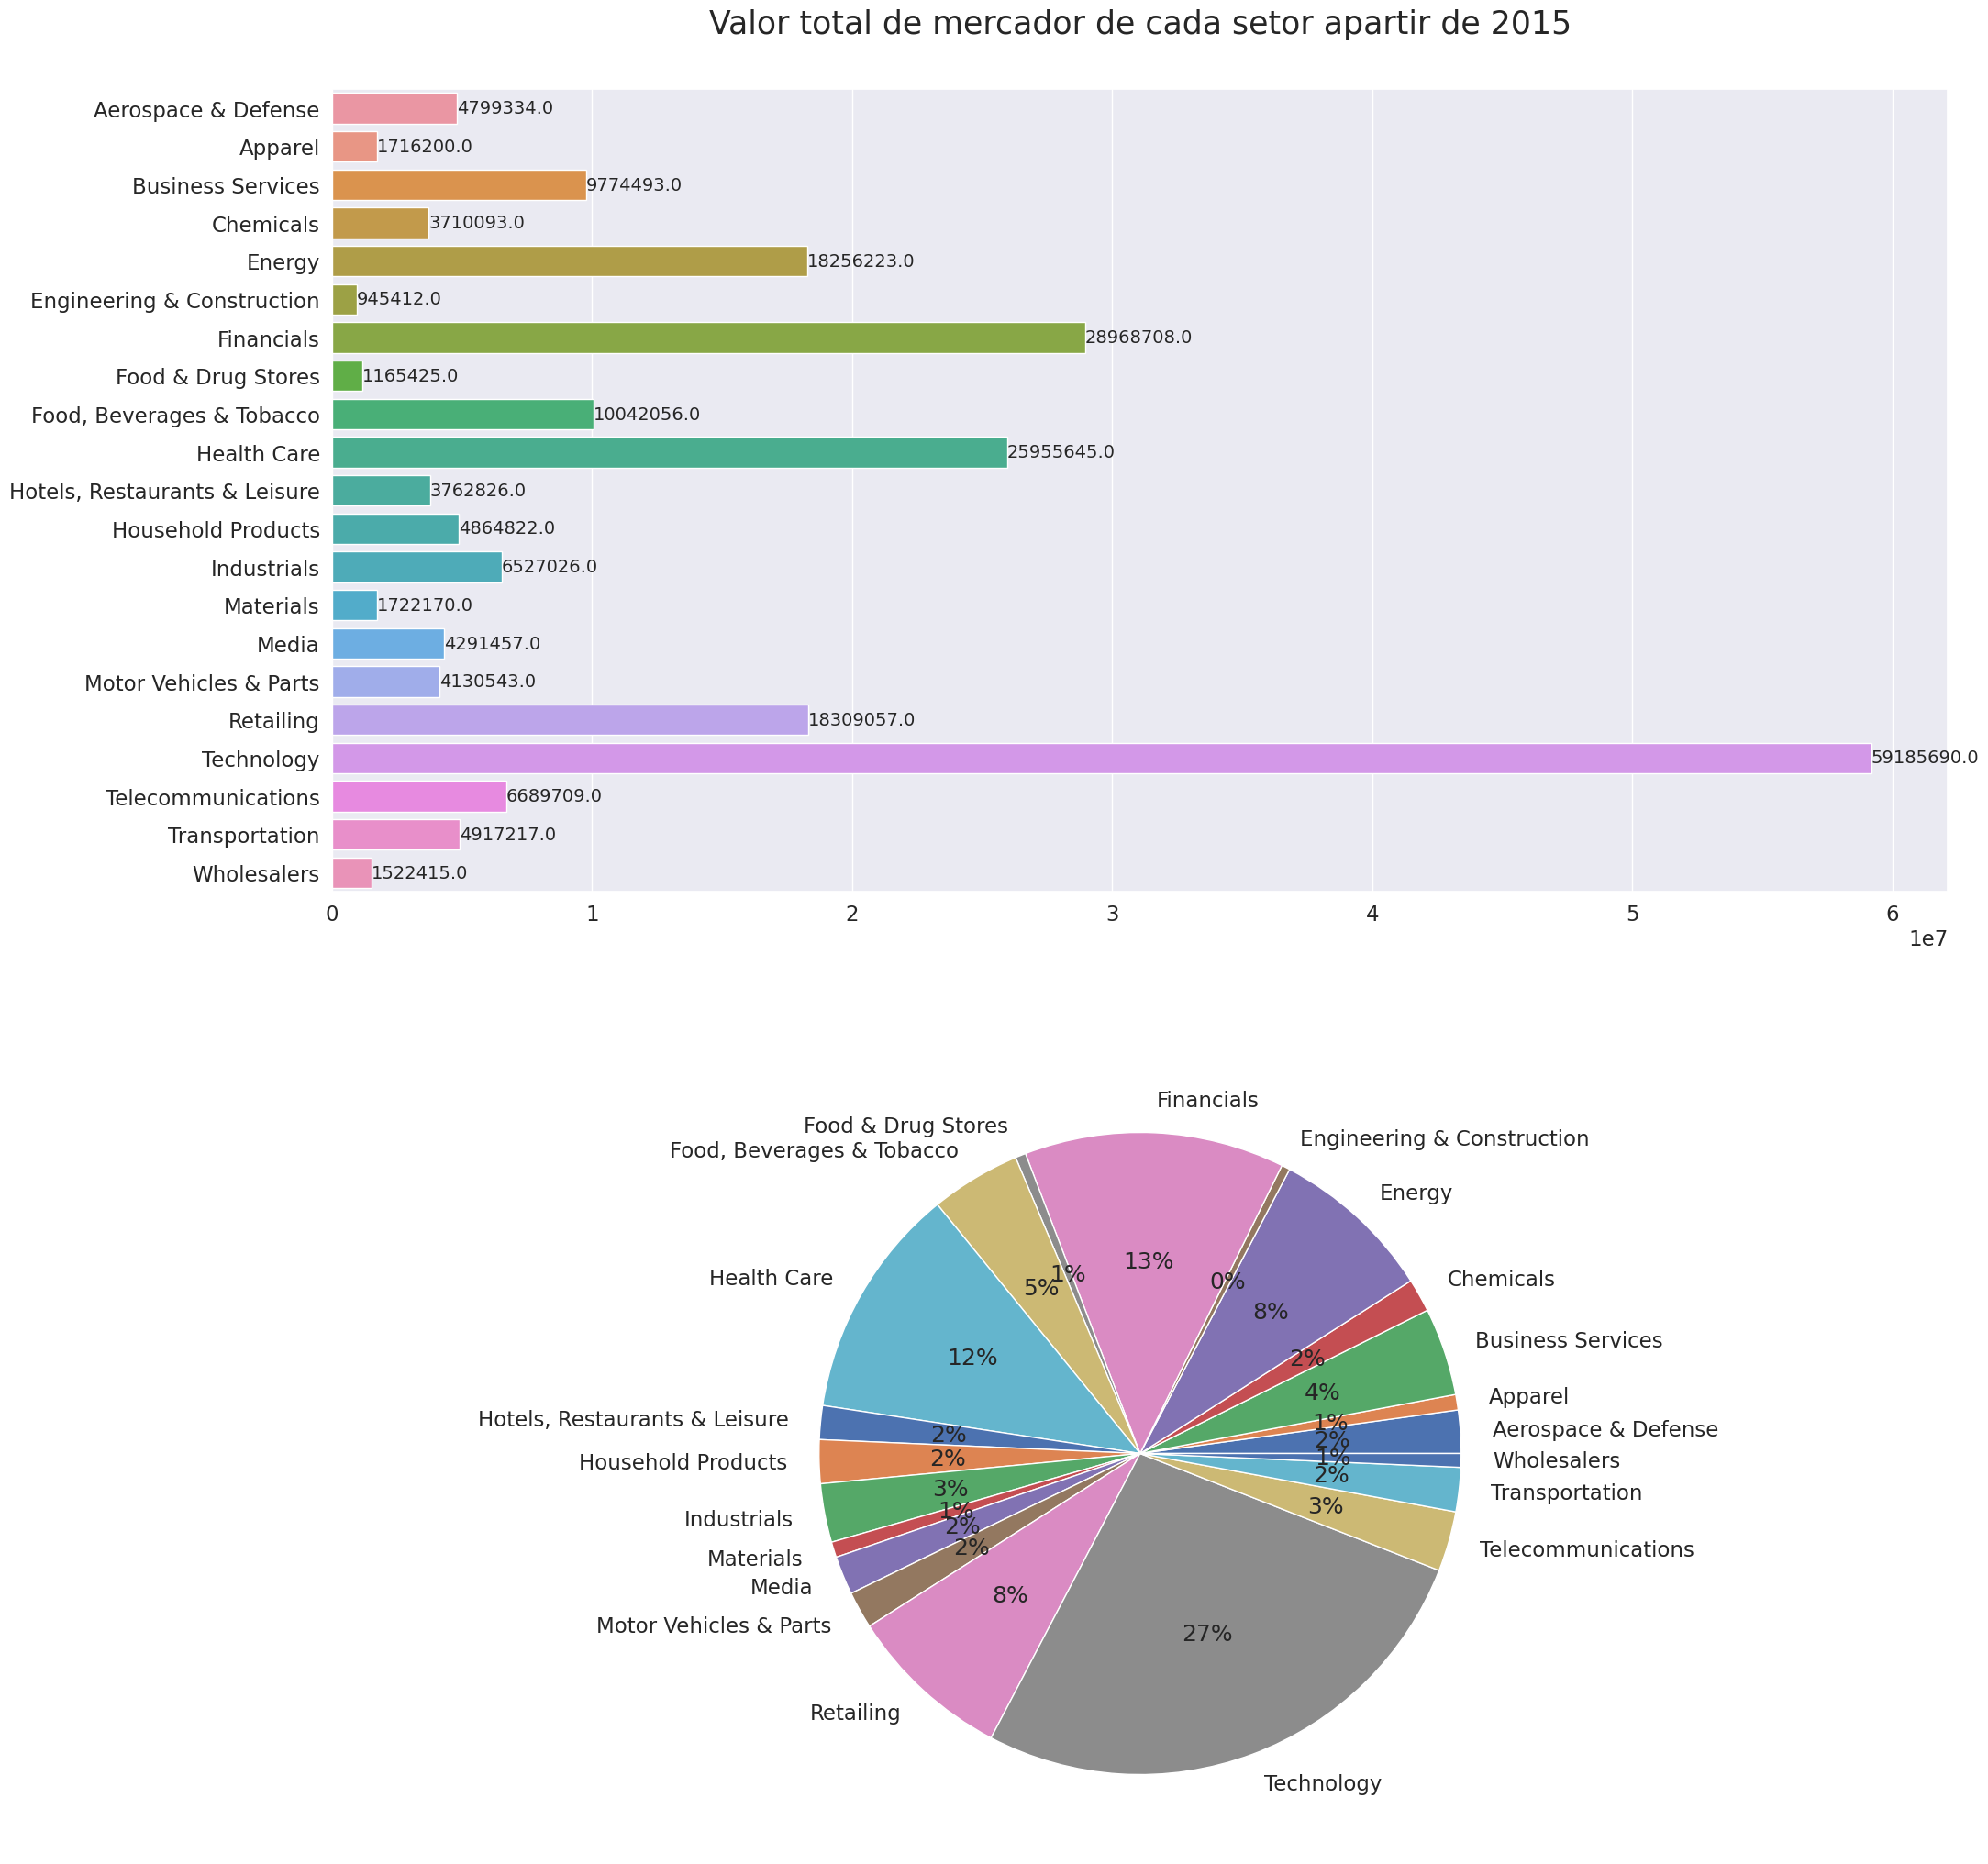

In [21]:
dados = dataSetor2.groupby('setor')['valor_de_mercado_mi'].sum()

plt.figure(figsize=(50,25))

# lembrar aumenta a escalar l
plt.subplot(221)
sea.set(font_scale=4.5)
sea.barplot(y=dados.index.values,x=dados.values)
plt.title('Valor total de mercador de cada setor apartir de 2015',fontsize=25,y=1.06)

# Colocar anotacao no barplot
ax = plt.gca() 
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', xytext=(0, 0), textcoords='offset points',fontsize=14)
plt.subplot(223)
sea.set(font_scale=1.5)
plt.pie(
    x=dados.values,labels=dados.index.values,
    autopct='%.0f%%',
)
plt.show()